# Data Cleanup and Wrangling

In [88]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

url = "https://moviesdatabase.p.rapidapi.com/titles/{id}"
querystring = {"info":"revenue_budget"}

headers = {
	"x-rapidapi-key": "9292e06bc9msh8780a7a7cba2601p11bfb1jsn413dded59c5d",
	"x-rapidapi-host": "moviesdatabase.p.rapidapi.com",
	"Content-Type": "application/json"
}

# Function to format a value as currency
def format_currency(value):
    return "${:,.2f}".format(value)

# Function to send movie_id to API
def send_movie_id(movie_id):
    response = requests.get(url.format(id=movie_id), headers=headers, params=querystring)
    
    if response.status_code == 200:
        return response.json()
    else:
        print("Could not get response from API")
    
    

# Iterate over DataFrame and send each movie_id
def get_revenue(movie_df):
    
    # This list will store the values for gross of each movie
    gross_list = []
    try: 
        for movie_id in movie_df['movie_id']:
            response = send_movie_id(movie_id)
            gross_list.append(response['results']['worldwideGross']['total']['amount'])
 
        movie_df.loc[:,'worldwide_gross'] = gross_list
    except Exception as e:
        print(f"Could not get response from API: {e}")


In [25]:
def get_top_movies(csv_path):
    try:
        # Create dataframe from CSV file
        movie_df = pd.read_csv(csv_path)
        
        # Drop unnecessary columns
        movie_df.drop(columns=['star_id', 'director_id', 'description', 'star', 'gross(in $)'], inplace=True)
        
        # Fill null values in columns we will use for analysis
        movie_df['rating'].fillna('N/A', inplace=True)
        movie_df['certificate'].fillna('N/A', inplace=True)
        
        # Cleanup in the director column
        movie_df['director'].apply(lambda name: str(name).replace("\r\n","&"))
        
        # Filtering for movies that have a rating
        movie_df = movie_df[movie_df['rating'] != 'N/A']
        
        # Changing data type for columns
        movie_df['votes'] = movie_df['votes'].astype(int)
        movie_df['rating'] = movie_df['rating'].astype(float)
        
        # Remove \r\n from the director column
        movie_df['director'] = movie_df['director'].str.replace('\r\n', '', regex=False)
        
        # Sort movies in descending order by votes and rating
        movie_df.sort_values(by=['votes', 'rating'], ascending=[False, False], inplace=True)
        
        # Reset index to 0 and start at 1
        movie_df.reset_index(drop = True, inplace = True)
        movie_df.index += 1
        
        top_movies = movie_df.head(10)
        get_revenue(top_movies)
        
        return top_movies    
        
    except Exception as e:
        print(f"Error getting your top 10 movies: {e}")

## Top 10 Action Movies

In [97]:
action_movies = get_top_movies(r"C:\Users\aj824\Downloads\Ironhack Data Analytics 2024\Week 3 Project\week_3_project\imdb_movies_by_genre\action.csv")

action_movies

C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'budget'] = budget_list
C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'worldwide_gross'] = gross_list


,movie_id,movie_name,year,certificate,runtime,genre,rating,director,votes,budget,worldwide_gross
1,tt0468569,The Dark Knight,2008,PG-13,152 min,"Action, Crime, Drama",9.0,Christopher Nolan,2675531,185000000,1005973645
2,tt1375666,Inception,2010,PG-13,148 min,"Action, Adventure, Sci-Fi",8.8,Christopher Nolan,2373707,160000000,836836967
3,tt0133093,The Matrix,1999,R,136 min,"Action, Sci-Fi",8.7,"Lana Wachowski, Lilly Wachowski",1928040,63000000,466625730
4,tt0120737,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,178 min,"Action, Adventure, Drama",8.8,Peter Jackson,1889727,93000000,897690072
5,tt0167260,The Lord of the Rings: The Return of the King,2003,PG-13,201 min,"Action, Adventure, Drama",9.0,Peter Jackson,1860374,94000000,1146030912
6,tt1345836,The Dark Knight Rises,2012,PG-13,164 min,"Action, Drama",8.4,Christopher Nolan,1717874,250000000,1081142612
7,tt0167261,The Lord of the Rings: The Two Towers,2002,PG-13,179 min,"Action, Adventure, Drama",8.8,Peter Jackson,1679818,94000000,947495095
8,tt0172495,Gladiator,2000,R,155 min,"Action, Adventure, Drama",8.5,Ridley Scott,1512747,103000000,465380802
9,tt0372784,Batman Begins,2005,PG-13,140 min,"Action, Crime, Drama",8.2,Christopher Nolan,1482505,150000000,373661946
10,tt0848228,The Avengers,2012,PG-13,143 min,"Action, Sci-Fi",8.0,Joss Whedon,1400257,220000000,1518815515


## Top 10 Animated Movies

In [27]:
animated_movies = get_top_movies(r"C:\Users\aj824\Downloads\Ironhack Data Analytics 2024\Week 3 Project\week_3_project\imdb_movies_by_genre\animation.csv")

animated_movies

C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'budget'] = budget_list
C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'worldwide_gross'] = gross_list


,movie_id,movie_name,year,certificate,runtime,genre,rating,director,votes,budget,worldwide_gross
1,tt0910970,WALL·E,2008,G,98 min,"Animation, Adventure, Family",8.4,Andrew Stanton,1129202,180000000,521311890
2,tt0110357,The Lion King,1994,G,88 min,"Animation, Adventure, Drama",8.5,"Roger Allers, Rob Minkoff",1071452,45000000,1063611805
3,tt1049413,Up,2009,PG,96 min,"Animation, Adventure, Comedy",8.3,"Pete Docter, Bob Peterson",1056429,175000000,735099102
4,tt0266543,Finding Nemo,2003,G,100 min,"Animation, Adventure, Comedy",8.2,"Andrew Stanton, Lee Unkrich",1055181,94000000,940352645
5,tt0114709,Toy Story,1995,G,81 min,"Animation, Adventure, Comedy",8.3,John Lasseter,1005692,30000000,394436586
6,tt0198781,"Monsters, Inc.",2001,G,92 min,"Animation, Adventure, Comedy",8.1,"Pete Docter, David Silverman, Lee Unkrich",920933,115000000,579707738
7,tt0435761,Toy Story 3,2010,G,103 min,"Animation, Adventure, Comedy",8.3,Lee Unkrich,845710,200000000,1066970811
8,tt0245429,Spirited Away,2001,PG,125 min,"Animation, Adventure, Family",8.6,Hayao Miyazaki,776225,19000000,355706103
9,tt0382932,Ratatouille,2007,G,111 min,"Animation, Adventure, Comedy",8.1,"Brad Bird, Jan Pinkava",752449,150000000,623726085
10,tt0892769,How to Train Your Dragon,2010,PG,98 min,"Animation, Action, Adventure",8.1,"Dean DeBlois, Chris Sanders",751157,165000000,494879471


## Top 10 Horror Movies

In [28]:
horror_movies = get_top_movies(r"C:\Users\aj824\Downloads\Ironhack Data Analytics 2024\Week 3 Project\week_3_project\imdb_movies_by_genre\horror.csv")

horror_movies

C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'budget'] = budget_list
C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'worldwide_gross'] = gross_list


,movie_id,movie_name,year,certificate,runtime,genre,rating,director,votes,budget,worldwide_gross
1,tt0081505,The Shining,1980,R,146 min,"Drama, Horror",8.4,Stanley Kubrick,1032203,19000000,46998772
2,tt0078748,Alien,1979,R,117 min,"Horror, Sci-Fi",8.5,Ridley Scott,890417,11000000,106285522
3,tt0480249,I Am Legend,2007,PG-13,101 min,"Action, Drama, Horror",7.2,Francis Lawrence,768223,150000000,585410052
4,tt0054215,Psycho,1960,R,109 min,"Horror, Mystery, Thriller",8.5,Alfred Hitchcock,677535,806947,32041845
5,tt0816711,World War Z,2013,PG-13,116 min,"Action, Adventure, Horror",7.0,Marc Forster,676411,190000000,540455876
6,tt0144084,American Psycho,2000,R,102 min,"Crime, Drama, Horror",7.6,Mary Harron,636221,7000000,34266564
7,tt5052448,Get Out,2017,R,104 min,"Horror, Mystery, Thriller",7.7,Jordan Peele,624515,4500000,255589157
8,tt1156398,Zombieland,2009,R,88 min,"Action, Comedy, Horror",7.6,Ruben Fleischer,585822,23600000,102392080
9,tt0365748,Shaun of the Dead,2004,R,99 min,"Comedy, Horror",7.9,Edgar Wright,564467,4000000,30097092
10,tt1396484,It,2017,R,135 min,Horror,7.3,Andy Muschietti,557690,35000000,701796444


## Top 10 Historical Movies

In [29]:
history_movies = get_top_movies(r"C:\Users\aj824\Downloads\Ironhack Data Analytics 2024\Week 3 Project\week_3_project\imdb_movies_by_genre\history.csv")

history_movies

C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'budget'] = budget_list
C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'worldwide_gross'] = gross_list


,movie_id,movie_name,year,certificate,runtime,genre,rating,director,votes,budget,worldwide_gross
1,tt0108052,Schindler's List,1993,R,195 min,"Biography, Drama, History",9.0,Steven Spielberg,1365712,22000000,322161245
2,tt0112573,Braveheart,1995,R,178 min,"Biography, Drama, History",8.4,Mel Gibson,1044563,72000000,213216216
3,tt2024544,12 Years a Slave,2013,R,134 min,"Biography, Drama, History",8.1,Steve McQueen,707268,20000000,187733202
4,tt1504320,The King's Speech,2010,R,118 min,"Biography, Drama, History",8.0,Tom Hooper,685771,15000000,427374317
5,tt5013056,Dunkirk,2017,PG-13,106 min,"Action, Drama, History",7.8,Christopher Nolan,669727,100000000,527016307
6,tt2119532,Hacksaw Ridge,2016,R,139 min,"Biography, Drama, History",8.1,Mel Gibson,535776,40000000,180563636
7,tt1596363,The Big Short,2015,R,130 min,"Biography, Comedy, Drama",7.8,Adam McKay,438736,28000000,133440870
8,tt0265086,Black Hawk Down,2001,R,144 min,"Action, Drama, History",7.7,Ridley Scott,401720,92000000,172989651
9,tt0395169,Hotel Rwanda,2004,PG-13,121 min,"Biography, Drama, History",8.1,Terry George,358818,17500000,33882243
10,tt0363163,Downfall,2004,R,156 min,"Biography, Drama, History",8.2,Oliver Hirschbiegel,358744,13500000,92181574


## Top 10 Biographical Movies

In [89]:
biographic_movies = get_top_movies(r"C:\Users\aj824\Downloads\Ironhack Data Analytics 2024\Week 3 Project\week_3_project\imdb_movies_by_genre\biography.csv")

biographic_movies

C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'budget'] = budget_list
C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'worldwide_gross'] = gross_list


,movie_id,movie_name,year,certificate,runtime,genre,rating,director,votes,budget,worldwide_gross
1,tt0993846,The Wolf of Wall Street,2013,R,180 min,"Biography, Comedy, Crime",8.2,Martin Scorsese,1437780,100000000,392000694
2,tt0108052,Schindler's List,1993,R,195 min,"Biography, Drama, History",9.0,Steven Spielberg,1369752,22000000,322161245
3,tt0099685,Goodfellas,1990,R,145 min,"Biography, Crime, Drama",8.7,Martin Scorsese,1175985,25000000,46963277
4,tt0112573,Braveheart,1995,R,178 min,"Biography, Drama, History",8.4,Mel Gibson,1046887,72000000,213216216
5,tt0264464,Catch Me If You Can,2002,PG-13,141 min,"Biography, Crime, Drama",8.1,Steven Spielberg,1003050,52000000,352114312
6,tt0268978,A Beautiful Mind,2001,PG-13,135 min,"Biography, Drama",8.2,Ron Howard,941682,58000000,316791257
7,tt1675434,The Intouchables,2011,R,112 min,"Biography, Comedy, Drama",8.5,"Olivier Nakache, Éric Toledano",870382,9500000,426588510
8,tt0253474,The Pianist,2002,R,150 min,"Biography, Drama, Music",8.5,Roman Polanski,843819,35000000,120072577
9,tt2084970,The Imitation Game,2014,PG-13,114 min,"Biography, Drama, Thriller",8.0,Morten Tyldum,781046,14000000,233555708
10,tt1285016,The Social Network,2010,PG-13,120 min,"Biography, Drama",7.8,David Fincher,714684,40000000,224920375


## Top 10 Adventure Movies

In [53]:
adventure_movies = get_top_movies(r"C:\Users\aj824\Downloads\Ironhack Data Analytics 2024\Week 3 Project\week_3_project\imdb_movies_by_genre\adventure.csv")

adventure_movies

C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'budget'] = budget_list
C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'worldwide_gross'] = gross_list


,movie_id,movie_name,year,certificate,runtime,genre,rating,director,votes,budget,worldwide_gross
1,tt1375666,Inception,2010,PG-13,148 min,"Action, Adventure, Sci-Fi",8.8,Christopher Nolan,2373707,160000000,836836967
2,tt0120737,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,178 min,"Action, Adventure, Drama",8.8,Peter Jackson,1889727,93000000,897690072
3,tt0167260,The Lord of the Rings: The Return of the King,2003,PG-13,201 min,"Action, Adventure, Drama",9.0,Peter Jackson,1860374,94000000,1146030912
4,tt0816692,Interstellar,2014,PG-13,169 min,"Adventure, Drama, Sci-Fi",8.6,Christopher Nolan,1859256,165000000,701729206
5,tt0167261,The Lord of the Rings: The Two Towers,2002,PG-13,179 min,"Action, Adventure, Drama",8.8,Peter Jackson,1679818,94000000,947495095
6,tt0172495,Gladiator,2000,R,155 min,"Action, Adventure, Drama",8.5,Ridley Scott,1512747,103000000,465380802
7,tt0361748,Inglourious Basterds,2009,R,153 min,"Adventure, Drama, War",8.3,Quentin Tarantino,1464903,70000000,321457747
8,tt0076759,Star Wars,1977,PG,121 min,"Action, Adventure, Fantasy",8.6,George Lucas,1374568,11000000,775398007
9,tt0499549,Avatar,2009,PG-13,162 min,"Action, Adventure, Fantasy",7.9,James Cameron,1322694,237000000,2847246203
10,tt0080684,Star Wars: Episode V - The Empire Strikes Back,1980,PG,124 min,"Action, Adventure, Fantasy",8.7,Irvin Kershner,1302151,18000000,538375067


## Top 10 Crime Movies

In [54]:
crime_movies = get_top_movies(r"C:\Users\aj824\Downloads\Ironhack Data Analytics 2024\Week 3 Project\week_3_project\imdb_movies_by_genre\crime.csv")

crime_movies

C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'budget'] = budget_list
C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'worldwide_gross'] = gross_list


,movie_id,movie_name,year,certificate,runtime,genre,rating,director,votes,budget,worldwide_gross
1,tt0468569,The Dark Knight,2008,PG-13,152 min,"Action, Crime, Drama",9.0,Christopher Nolan,2675531,185000000,1005973645
2,tt0110912,Pulp Fiction,1994,R,154 min,"Crime, Drama",8.9,Quentin Tarantino,2074027,8000000,213928762
3,tt0068646,The Godfather,1972,R,175 min,"Crime, Drama",9.2,Francis Ford Coppola,1875646,6000000,246120986
4,tt0114369,Se7en,1995,R,127 min,"Crime, Drama, Mystery",8.6,David Fincher,1668095,33000000,327333559
5,tt0372784,Batman Begins,2005,PG-13,140 min,"Action, Crime, Drama",8.2,Christopher Nolan,1482505,150000000,373661946
6,tt0102926,The Silence of the Lambs,1991,R,118 min,"Crime, Drama, Thriller",8.6,Jonathan Demme,1444522,19000000,272742922
7,tt0993846,The Wolf of Wall Street,2013,R,180 min,"Biography, Comedy, Crime",8.2,Martin Scorsese,1430476,100000000,392000694
8,tt0407887,The Departed,2006,R,151 min,"Crime, Drama, Thriller",8.5,Martin Scorsese,1335810,90000000,291465373
9,tt0120689,The Green Mile,1999,R,189 min,"Crime, Drama, Fantasy",8.6,Frank Darabont,1313365,60000000,286801374
10,tt7286456,Joker,2019,R,122 min,"Crime, Drama, Thriller",8.4,Todd Phillips,1310698,55000000,1074419384


## Top 10 Family Movies

In [32]:
family_movies = get_top_movies(r"C:\Users\aj824\Downloads\Ironhack Data Analytics 2024\Week 3 Project\week_3_project\imdb_movies_by_genre\family.csv")

family_movies

C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'budget'] = budget_list
C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'worldwide_gross'] = gross_list


,movie_id,movie_name,year,certificate,runtime,genre,rating,director,votes,budget,worldwide_gross
1,tt0910970,WALL·E,2008,G,98 min,"Animation, Adventure, Family",8.4,Andrew Stanton,1125637,180000000,521311890
2,tt0110357,The Lion King,1994,G,88 min,"Animation, Adventure, Drama",8.5,"Roger Allers, Rob Minkoff",1067916,45000000,1063611805
3,tt1049413,Up,2009,PG,96 min,"Animation, Adventure, Comedy",8.3,"Pete Docter, Bob Peterson",1053216,175000000,735099102
4,tt0266543,Finding Nemo,2003,G,100 min,"Animation, Adventure, Comedy",8.2,"Andrew Stanton, Lee Unkrich",1052394,94000000,940352645
5,tt0114709,Toy Story,1995,G,81 min,"Animation, Adventure, Comedy",8.3,John Lasseter,1002538,30000000,394436586
6,tt0198781,"Monsters, Inc.",2001,G,92 min,"Animation, Adventure, Comedy",8.1,"Pete Docter, David Silverman, Lee Unkrich",918097,115000000,579707738
7,tt1201607,Harry Potter and the Deathly Hallows: Part 2,2011,PG-13,130 min,"Adventure, Family, Fantasy",8.1,David Yates,885463,125000000,1342321665
8,tt0435761,Toy Story 3,2010,G,103 min,"Animation, Adventure, Comedy",8.3,Lee Unkrich,843295,200000000,1066970811
9,tt0241527,Harry Potter and the Sorcerer's Stone,2001,PG,152 min,"Adventure, Family, Fantasy",7.6,Chris Columbus,792448,125000000,1016813075
10,tt0245429,Spirited Away,2001,PG,125 min,"Animation, Adventure, Family",8.6,Hayao Miyazaki,772809,19000000,355706103


## Top 10 Fantasy Movies

In [33]:
fantasy_movies = get_top_movies(r"C:\Users\aj824\Downloads\Ironhack Data Analytics 2024\Week 3 Project\week_3_project\imdb_movies_by_genre\fantasy.csv")

fantasy_movies

C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'budget'] = budget_list
C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'worldwide_gross'] = gross_list


,movie_id,movie_name,year,certificate,runtime,genre,rating,director,votes,budget,worldwide_gross
1,tt0120737,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,178 min,"Action, Adventure, Drama",8.8,Peter Jackson,1889727,93000000,897690072
2,tt0167260,The Lord of the Rings: The Return of the King,2003,PG-13,201 min,"Action, Adventure, Drama",9.0,Peter Jackson,1860374,94000000,1146030912
3,tt0167261,The Lord of the Rings: The Two Towers,2002,PG-13,179 min,"Action, Adventure, Drama",8.8,Peter Jackson,1679818,94000000,947495095
4,tt0076759,Star Wars,1977,PG,121 min,"Action, Adventure, Fantasy",8.6,George Lucas,1374568,11000000,775398007
5,tt0499549,Avatar,2009,PG-13,162 min,"Action, Adventure, Fantasy",7.9,James Cameron,1322694,237000000,2847246203
6,tt0120689,The Green Mile,1999,R,189 min,"Crime, Drama, Fantasy",8.6,Frank Darabont,1313365,60000000,286801374
7,tt0080684,Star Wars: Episode V - The Empire Strikes Back,1980,PG,124 min,"Action, Adventure, Fantasy",8.7,Irvin Kershner,1302151,18000000,538375067
8,tt0325980,Pirates of the Caribbean: The Curse of the Bla...,2003,PG-13,143 min,"Action, Adventure, Fantasy",8.1,Gore Verbinski,1137362,140000000,654264015
9,tt0086190,Star Wars: Episode VI - Return of the Jedi,1983,PG,131 min,"Action, Adventure, Fantasy",8.3,Richard Marquand,1062181,32500000,475106177
10,tt0114709,Toy Story,1995,G,81 min,"Animation, Adventure, Comedy",8.3,John Lasseter,1002538,30000000,394436586


## Top 10 Mystery Movies

In [35]:
mystery_movies = get_top_movies(r"C:\Users\aj824\Downloads\Ironhack Data Analytics 2024\Week 3 Project\week_3_project\imdb_movies_by_genre\mystery.csv")

mystery_movies

C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'budget'] = budget_list
C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'worldwide_gross'] = gross_list


,movie_id,movie_name,year,certificate,runtime,genre,rating,director,votes,budget,worldwide_gross
1,tt0114369,Se7en,1995,R,127 min,"Crime, Drama, Mystery",8.6,David Fincher,1668095,33000000,327333559
2,tt0482571,The Prestige,2006,PG-13,130 min,"Drama, Mystery, Sci-Fi",8.5,Christopher Nolan,1344449,40000000,109676311
3,tt1130884,Shutter Island,2010,R,138 min,"Mystery, Thriller",8.2,Martin Scorsese,1332201,80000000,294805697
4,tt0120689,The Green Mile,1999,R,189 min,"Crime, Drama, Fantasy",8.6,Frank Darabont,1313365,60000000,286801374
5,tt0209144,Memento,2000,R,113 min,"Mystery, Thriller",8.4,Christopher Nolan,1247771,9000000,40047078
6,tt0114814,The Usual Suspects,1995,R,106 min,"Crime, Drama, Mystery",8.5,Bryan Singer,1092586,6000000,23341568
7,tt0167404,The Sixth Sense,1999,PG-13,107 min,"Drama, Mystery, Thriller",8.2,M. Night Shyamalan,999364,40000000,672806432
8,tt2267998,Gone Girl,2014,R,149 min,"Drama, Mystery, Thriller",8.1,David Fincher,993335,61000000,369330363
9,tt1201607,Harry Potter and the Deathly Hallows: Part 2,2011,PG-13,130 min,"Adventure, Family, Fantasy",8.1,David Yates,885463,125000000,1342321665
10,tt0246578,Donnie Darko,2001,R,113 min,"Drama, Mystery, Sci-Fi",8.0,Richard Kelly,809597,6000000,6981586


## Top 10 Romance Movies

In [36]:
romance_movies = get_top_movies(r"C:\Users\aj824\Downloads\Ironhack Data Analytics 2024\Week 3 Project\week_3_project\imdb_movies_by_genre\romance.csv")

romance_movies

C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'budget'] = budget_list
C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'worldwide_gross'] = gross_list


,movie_id,movie_name,year,certificate,runtime,genre,rating,director,votes,budget,worldwide_gross
1,tt0109830,Forrest Gump,1994,PG-13,142 min,"Drama, Romance",8.8,Robert Zemeckis,2106826,55000000,678226133
2,tt0120338,Titanic,1997,PG-13,194 min,"Drama, Romance",7.9,James Cameron,1202799,200000000,2201647264
3,tt0338013,Eternal Sunshine of the Spotless Mind,2004,R,108 min,"Drama, Romance, Sci-Fi",8.3,Michel Gondry,1020305,20000000,74036715
4,tt0119217,Good Will Hunting,1997,R,126 min,"Drama, Romance",8.3,Gus Van Sant,987571,10000000,225933435
5,tt1010048,Slumdog Millionaire,2008,R,120 min,"Crime, Drama, Romance",8.0,"Danny Boyle, Loveleen Tandan",852953,15000000,378410542
6,tt0211915,Amélie,2001,R,122 min,"Comedy, Romance",8.3,Jean-Pierre Jeunet,763735,10000000,174100765
7,tt1045658,Silver Linings Playbook,2012,R,122 min,"Comedy, Drama, Romance",7.7,David O. Russell,716784,21000000,236412453
8,tt0118799,Life Is Beautiful,1997,PG-13,116 min,"Comedy, Drama, Romance",8.6,Roberto Benigni,703554,20000000,230098753
9,tt0126029,Shrek,2001,PG,90 min,"Animation, Adventure, Comedy",7.9,"Andrew Adamson, Vicky Jenson",690470,60000000,487853320
10,tt0421715,The Curious Case of Benjamin Button,2008,PG-13,166 min,"Drama, Fantasy, Romance",7.8,David Fincher,660943,150000000,335802786


## Top 10 SciFi Movies

In [37]:
scifi_movies = get_top_movies(r"C:\Users\aj824\Downloads\Ironhack Data Analytics 2024\Week 3 Project\week_3_project\imdb_movies_by_genre\scifi.csv")

scifi_movies

C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'budget'] = budget_list
C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'worldwide_gross'] = gross_list


,movie_id,movie_name,year,certificate,runtime,genre,rating,director,votes,budget,worldwide_gross
1,tt1375666,Inception,2010,PG-13,148 min,"Action, Adventure, Sci-Fi",8.8,Christopher Nolan,2373707,160000000,836836967
2,tt0133093,The Matrix,1999,R,136 min,"Action, Sci-Fi",8.7,"Lana Wachowski, Lilly Wachowski",1928040,63000000,466625730
3,tt0816692,Interstellar,2014,PG-13,169 min,"Adventure, Drama, Sci-Fi",8.6,Christopher Nolan,1859284,165000000,701729206
4,tt0848228,The Avengers,2012,PG-13,143 min,"Action, Sci-Fi",8.0,Joss Whedon,1400267,220000000,1518815515
5,tt0076759,Star Wars,1977,PG,121 min,"Action, Adventure, Fantasy",8.6,George Lucas,1374575,11000000,775398007
6,tt0482571,The Prestige,2006,PG-13,130 min,"Drama, Mystery, Sci-Fi",8.5,Christopher Nolan,1344459,40000000,109676311
7,tt0499549,Avatar,2009,PG-13,162 min,"Action, Adventure, Fantasy",7.9,James Cameron,1322718,237000000,2847246203
8,tt0080684,Star Wars: Episode V - The Empire Strikes Back,1980,PG,124 min,"Action, Adventure, Fantasy",8.7,Irvin Kershner,1302161,18000000,538375067
9,tt0088763,Back to the Future,1985,PG,116 min,"Adventure, Comedy, Sci-Fi",8.5,Robert Zemeckis,1217088,19000000,381906762
10,tt2015381,Guardians of the Galaxy,2014,PG-13,121 min,"Action, Adventure, Comedy",8.0,James Gunn,1189928,170000000,773350147


## Top 10 Sports Movies

In [38]:
sports_movies = get_top_movies(r"C:\Users\aj824\Downloads\Ironhack Data Analytics 2024\Week 3 Project\week_3_project\imdb_movies_by_genre\sports.csv")

sports_movies

C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'budget'] = budget_list
C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'worldwide_gross'] = gross_list


,movie_id,movie_name,year,certificate,runtime,genre,rating,director,votes,budget,worldwide_gross
1,tt0405159,Million Dollar Baby,2004,UA,132 min,"Drama, Sport",8.1,Clint Eastwood,692544,30000000,216763646
2,tt0075148,Rocky,1976,U,120 min,"Drama, Sport",8.1,John G. Avildsen,584389,960000,117250382
3,tt1979320,Rush,2013,R,123 min,"Action, Biography, Drama",8.1,Ron Howard,484813,38000000,96983009
4,tt1291584,Warrior,2011,UA,140 min,"Action, Drama, Sport",8.2,Gavin O'Connor,476838,25000000,23308615
5,tt1210166,Moneyball,2011,13,133 min,"Biography, Drama, Sport",7.6,Bennett Miller,430536,50000000,110206216
6,tt0317219,Cars,2006,U,117 min,"Animation, Adventure, Comedy",7.2,"John Lasseter, \nJoe Ranft",429700,120000000,461991867
7,tt1950186,Ford v Ferrari,2019,UA,152 min,"Action, Biography, Drama",8.1,James Mangold,403381,97600000,225508210
8,tt0964517,The Fighter,2010,UA,116 min,"Action, Biography, Drama",7.8,David O. Russell,372823,25000000,129190869
9,tt0081398,Raging Bull,1980,A,129 min,"Biography, Drama, Sport",8.2,Martin Scorsese,357886,18000000,23402427
10,tt0878804,The Blind Side,2009,UA,129 min,"Biography, Drama, Sport",7.6,John Lee Hancock,338059,29000000,309208309


## Top 10 Thriller Movies

In [55]:
thriller_movies = get_top_movies(r"C:\Users\aj824\Downloads\Ironhack Data Analytics 2024\Week 3 Project\week_3_project\imdb_movies_by_genre\thriller.csv")

thriller_movies

C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'budget'] = budget_list
C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'worldwide_gross'] = gross_list


,movie_id,movie_name,year,certificate,runtime,genre,rating,director,votes,budget,worldwide_gross
1,tt0468569,The Dark Knight,2008,PG-13,152 min,"Action, Crime, Drama",9.0,Christopher Nolan,2675531,185000000,1005973645
2,tt1375666,Inception,2010,PG-13,148 min,"Action, Adventure, Sci-Fi",8.8,Christopher Nolan,2373707,160000000,836836967
3,tt0114369,Se7en,1995,R,127 min,"Crime, Drama, Mystery",8.6,David Fincher,1668095,33000000,327333559
4,tt0102926,The Silence of the Lambs,1991,R,118 min,"Crime, Drama, Thriller",8.6,Jonathan Demme,1444522,19000000,272742922
5,tt0482571,The Prestige,2006,PG-13,130 min,"Drama, Mystery, Sci-Fi",8.5,Christopher Nolan,1344449,40000000,109676311
6,tt0407887,The Departed,2006,R,151 min,"Crime, Drama, Thriller",8.5,Martin Scorsese,1335810,90000000,291465373
7,tt1130884,Shutter Island,2010,R,138 min,"Mystery, Thriller",8.2,Martin Scorsese,1332201,80000000,294805697
8,tt7286456,Joker,2019,R,122 min,"Crime, Drama, Thriller",8.4,Todd Phillips,1310698,55000000,1074419384
9,tt0209144,Memento,2000,R,113 min,"Mystery, Thriller",8.4,Christopher Nolan,1247771,9000000,40047078
10,tt0110413,Léon: The Professional,1994,R,110 min,"Action, Crime, Drama",8.5,Luc Besson,1171574,115000000,19552639


## Top 10 War Movies

In [40]:
war_movies = get_top_movies(r"C:\Users\aj824\Downloads\Ironhack Data Analytics 2024\Week 3 Project\week_3_project\imdb_movies_by_genre\war.csv")

war_movies

C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'budget'] = budget_list
C:\Users\aj824\AppData\Local\Temp\ipykernel_42844\2133682834.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'worldwide_gross'] = gross_list


,movie_id,movie_name,year,certificate,runtime,genre,rating,director,votes,budget,worldwide_gross
1,tt0361748,Inglourious Basterds,2009,R,153 min,"Adventure, Drama, War",8.3,Quentin Tarantino,1464903,70000000,321457747
2,tt0120815,Saving Private Ryan,1998,R,169 min,"Drama, War",8.6,Steven Spielberg,1402550,70000000,482349603
3,tt0112573,Braveheart,1995,R,178 min,"Biography, Drama, History",8.4,Mel Gibson,1044563,72000000,213216216
4,tt0253474,The Pianist,2002,R,150 min,"Biography, Drama, Music",8.5,Roman Polanski,840756,35000000,120072577
5,tt2084970,The Imitation Game,2014,PG-13,114 min,"Biography, Drama, Thriller",8.0,Morten Tyldum,778565,14000000,233555708
6,tt0093058,Full Metal Jacket,1987,R,116 min,"Drama, War",8.3,Stanley Kubrick,748878,30000000,46357676
7,tt0118799,Life Is Beautiful,1997,PG-13,116 min,"Comedy, Drama, Romance",8.6,Roberto Benigni,701318,20000000,230098753
8,tt1631867,Edge of Tomorrow,2014,PG-13,113 min,"Action, Adventure, Sci-Fi",7.9,Doug Liman,687691,178000000,370541256
9,tt0457430,Pan's Labyrinth,2006,R,118 min,"Drama, Fantasy, War",8.2,Guillermo del Toro,674357,19000000,83850267
10,tt0078788,Apocalypse Now,1979,R,147 min,"Drama, Mystery, War",8.5,Francis Ford Coppola,673330,31500000,92158064


# Hypothesis Testing

In [98]:
merged_movies = pd.concat([action_movies, adventure_movies, animated_movies, history_movies, biographic_movies, mystery_movies, romance_movies, scifi_movies, sports_movies, thriller_movies, horror_movies, war_movies, family_movies], axis = 0)

merged_movies.duplicated().sum()
merged_movies.drop_duplicates(inplace = True)
merged_movies.drop(columns=['movie_id'], inplace = True)
merged_movies.sort_values(by=['votes', 'rating'], ascending = [False, False], inplace = True)
merged_movies.reset_index(drop=True, inplace = True)
merged_movies.index += 1

merged_movies

,movie_name,year,certificate,runtime,genre,rating,director,votes,budget,worldwide_gross
1,The Dark Knight,2008,PG-13,152 min,"Action, Crime, Drama",9.0,Christopher Nolan,2675531,185000000,1005973645
2,Inception,2010,PG-13,148 min,"Action, Adventure, Sci-Fi",8.8,Christopher Nolan,2373707,160000000,836836967
3,Forrest Gump,1994,PG-13,142 min,"Drama, Romance",8.8,Robert Zemeckis,2106826,55000000,678226133
4,The Matrix,1999,R,136 min,"Action, Sci-Fi",8.7,"Lana Wachowski, Lilly Wachowski",1928040,63000000,466625730
5,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,178 min,"Action, Adventure, Drama",8.8,Peter Jackson,1889727,93000000,897690072
...,...,...,...,...,...,...,...,...,...,...
110,The Fighter,2010,UA,116 min,"Action, Biography, Drama",7.8,David O. Russell,372823,25000000,129190869
111,Hotel Rwanda,2004,PG-13,121 min,"Biography, Drama, History",8.1,Terry George,358818,17500000,33882243
112,Downfall,2004,R,156 min,"Biography, Drama, History",8.2,Oliver Hirschbiegel,358744,13500000,92181574
113,Raging Bull,1980,A,129 min,"Biography, Drama, Sport",8.2,Martin Scorsese,357886,18000000,23402427


### Hypothesis 1: Correlation between a movie ratings and its wordwide gross 

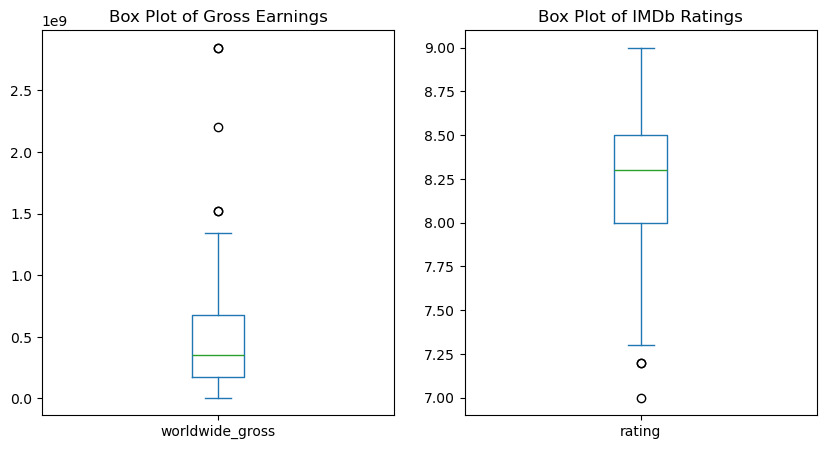

In [99]:
# Assuming your DataFrame is named df
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
merged_movies['worldwide_gross'].plot(kind='box', title='Box Plot of Gross Earnings')
plt.subplot(1, 2, 2)
merged_movies['rating'].plot(kind='box', title='Box Plot of IMDb Ratings')
plt.show()

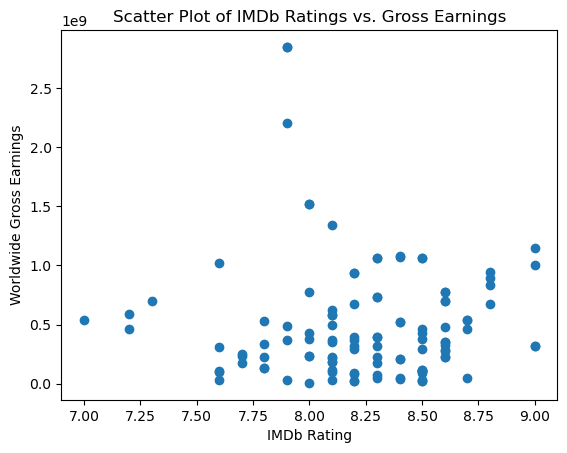

In [100]:
# Creates a scatter plot to visualize how gross values change in relation to the IMDB rating
plt.scatter(merged_movies['rating'], merged_movies['worldwide_gross'])
plt.xlabel('IMDb Rating')
plt.ylabel('Worldwide Gross Earnings')
plt.title('Scatter Plot of IMDb Ratings vs. Gross Earnings')
plt.show()

In [101]:
# Calculates the Pearson correlation coeficcient
correlation = merged_movies['rating'].corr(merged_movies['worldwide_gross'])
print(f"Pearson correlation coefficient: {correlation}")


Pearson correlation coefficient: -0.025429192847022566


### Hypothesis 3: Are there any significant differences in movie durations across genres?

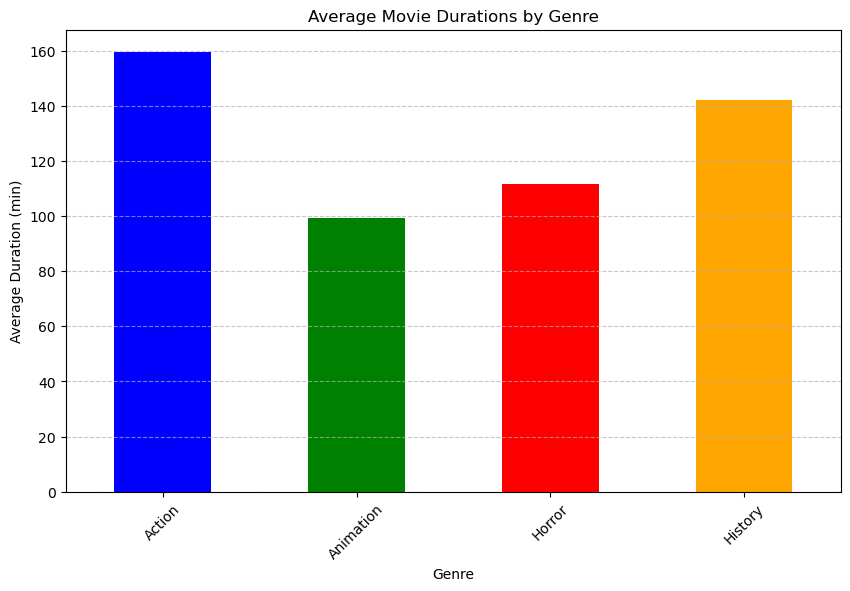

In [102]:
# Creates a dictionary with the genres and the runtimes of the top 10 movies.
movie_lengths = {
    'Action': [152, 148, 136, 178, 201, 164, 179, 155, 140, 143],
    'Animation': [98, 88, 96, 100, 81, 92, 103, 125, 111, 98],
    'Horror': [146, 117, 101, 109, 116, 102, 104, 88, 99, 135],
    'History': [195, 178, 134, 118, 106, 139, 130, 144, 121, 156]
}

# Converts dictionary to a Data Frame
df = pd.DataFrame(movie_lengths)


# Creating visuals stats with pyplot
plt.figure(figsize=(10, 6))
df.mean().plot(kind='bar', color=['blue', 'green', 'red', 'orange'])
plt.title('Average Movie Durations by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Duration (min)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()